                                             TP TANO ASSANDE JACOB
                                   Etudiant en master II data science big data

In [1]:
import pandas as pd
import numpy as np
t_data = pd.read_csv("E:\\MASTER2 DS-BD\SPARK\data\\train.csv")
t_data.head()
log_dico = {'Survived':t_data.iloc[:,1],'SibSp':t_data.iloc[:,6],'Parch':t_data.iloc[:,7],'Fare':t_data.iloc[:,9]}
logistique_data = pd.DataFrame(log_dico)

In [2]:
logistique_data.head()

,Survived,SibSp,Parch,Fare
0,0,1,0,7.2500
1,1,1,0,71.2833
2,1,0,0,7.9250
3,1,1,0,53.1000
4,0,0,0,8.0500


In [3]:
t_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
from sklearn import preprocessing

def dummify_features(df):
    """
    Transform categorical variables to dummy variables.

    Parameters
    ----------
    df: dataframe containing only categorical features

    Returns
    -------
    X: new dataframe with dummified features
       Each column name becomes the previous one + the modality of the feature

    enc: the OneHotEncoder that produced X (it's used later in the processing chain)
    """
    colnames = df.columns
    le_dict = {}
    for col in colnames:
        le_dict[col] = preprocessing.LabelEncoder()
        le_dict[col].fit(df[col])
        df.loc[:, col] = le_dict[col].transform(df[col])

    enc = preprocessing.OneHotEncoder()
    enc.fit(df)
    X = enc.transform(df)

    dummy_colnames = [cv + '_' + str(modality) for cv in colnames for modality in le_dict[cv].classes_]
    # for cv in colnames:
    #     for modality in le_dict[cv].classes_:
    #         dummy_colnames.append(cv + '_' + modality)

    return X, dummy_colnames, enc
#to_dummify = ["Pclass"]
#X_dummy, dummy_columns, dummy_encoder = dummify_features(t_data[to_dummify])
#X_dummy = pd.DataFrame(X_dummy.toarray(), columns=dummy_columns)

In [5]:
def cleanData(df):
    for col in df.columns:
        if df[col].dtype == object:
            df.col = df[col].fillna(df[col].mode()[0])
        else:
            df.col = df[col].fillna(df[col].median())
    return df

logistique_data = cleanData(logistique_data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [6]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,
 class_weight=None, random_state=None, solver='warn',  max_iter=100, multi_class='warn', verbose=0, warm_start=False,
 n_jobs=None, l1_ratio=None)

In [7]:
def splitData(df):
    from sklearn.model_selection import train_test_split
    X_train, X_val = train_test_split(df, test_size=0.33, random_state=42)
    return X_train, X_val

train_dt,valid_dt = splitData(logistique_data)
train_dt.head()

,Survived,SibSp,Parch,Fare
6,0,0,0,51.8625
718,0,0,0,15.5000
685,0,1,2,41.5792
73,0,1,0,14.4542
882,0,0,0,10.5167


In [8]:
model.fit(train_dt.iloc[:,1:4],train_dt.Survived)
model.predict(valid_dt.iloc[:,1:4])
model.score(valid_dt.iloc[:,1:4], valid_dt.Survived)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6711864406779661

###  CROSS VALIDATION

In [9]:

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,logistique_data.iloc[:,1:4], logistique_data.Survived, cv=5)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [10]:
#Score en cross validation
scores.mean()

0.674548857768335

### AJOUT DE LA VARIABLE PCLASS

In [11]:
logistique_data['Pclass'] = t_data.loc[:,'Pclass']
to_dummify = ["Pclass"]
X_dummy, dummy_columns, dummy_encoder = dummify_features(logistique_data[to_dummify])
X_dummy = pd.DataFrame(X_dummy.toarray(), columns=dummy_columns)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [12]:
def addColonnes(df,dico):
    d1 = pd.DataFrame(dico)
    res_df = pd.concat([df, d1], axis=1)
    return cleanData(res_df)

In [13]:
new_train_dt = addColonnes(logistique_data,X_dummy)
logistique_data = new_train_dt.drop(['Pclass'],axis=1)
logistique_data = cleanData(logistique_data)
train_dt,valid_dt = splitData(logistique_data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [14]:
train_dt.head()

,Survived,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3
6,0,0,0,51.8625,1.0,0.0,0.0
718,0,0,0,15.5000,0.0,0.0,1.0
685,0,1,2,41.5792,0.0,1.0,0.0
73,0,1,0,14.4542,0.0,0.0,1.0
882,0,0,0,10.5167,0.0,0.0,1.0


In [15]:
model.fit(train_dt.iloc[:,1:],train_dt.Survived)
model.predict(valid_dt.iloc[:,1:])
print("Score : "+str(model.score(valid_dt.iloc[:,1:], valid_dt.Survived)))

Score : 0.7152542372881356


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### AJOUT DE LA VARIABLE AGE

In [16]:
c_age=[1 if x<10 else 0 for x in t_data.Age]

In [17]:
dic = {'C_age':c_age}
new_train_dt = addColonnes(logistique_data,dic)
logistique_data = cleanData(logistique_data)
train_dt,valid_dt = splitData(new_train_dt)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [18]:
train_dt.head()

,Survived,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,C_age
6,0,0,0,51.8625,1.0,0.0,0.0,0
718,0,0,0,15.5000,0.0,0.0,1.0,0
685,0,1,2,41.5792,0.0,1.0,0.0,0
73,0,1,0,14.4542,0.0,0.0,1.0,0
882,0,0,0,10.5167,0.0,0.0,1.0,0


In [19]:
model.fit(train_dt.iloc[:,1:],train_dt.Survived)
model.predict(valid_dt.iloc[:,1:])
print("Score : "+str(model.score(valid_dt.iloc[:,1:], valid_dt.Survived)))

Score : 0.7288135593220338


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### AJOUT DE LA VARIABLE SEX

In [20]:
new_train_dt['Sex'] = t_data.loc[:,'Sex']
to_dummify = ["Sex"]
X_dummy, dummy_columns, dummy_encoder = dummify_features(new_train_dt[to_dummify])
X_dummy = pd.DataFrame(X_dummy.toarray(), columns=dummy_columns)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [21]:
new_train_dt = addColonnes(new_train_dt,X_dummy)
new_train_dt = new_train_dt.drop(['Sex'],axis=1)
train_dt,valid_dt = splitData(new_train_dt)
train_dt.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,Survived,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,C_age,Sex_female,Sex_male
6,0,0,0,51.8625,1.0,0.0,0.0,0,0.0,1.0
718,0,0,0,15.5000,0.0,0.0,1.0,0,0.0,1.0
685,0,1,2,41.5792,0.0,1.0,0.0,0,0.0,1.0
73,0,1,0,14.4542,0.0,0.0,1.0,0,0.0,1.0
882,0,0,0,10.5167,0.0,0.0,1.0,0,1.0,0.0


In [22]:
model.fit(train_dt.iloc[:,1:],train_dt.Survived)
model.predict(valid_dt.iloc[:,1:])
print("Score : "+str(model.score(valid_dt.iloc[:,1:], valid_dt.Survived)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score : 0.8169491525423729


### PLOT survived AND dead

In [23]:
survived = t_data[t_data.Survived == 1]
dead = t_data[t_data.Survived == 0]

Populating the interactive namespace from numpy and matplotlib


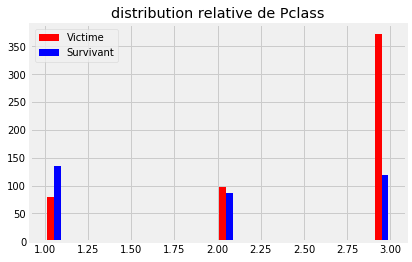

In [24]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline
%pylab inline

def plot_hist(feature, bins=20):
    x1 = np.array(dead[feature].dropna())
    x2 = np.array(survived[feature].dropna())
    plt.hist([x1, x2], label=["Victime", "Survivant"], bins=bins, color=['r', 'b'])
    plt.legend(loc="upper left")
    plt.title('distribution relative de %s' %feature)
    plt.show()
plot_hist('Pclass')

### AJOUT DE LA VARIABLE TITLE

In [25]:
name_list = list(t_data.Name)

In [26]:
D = [i.split(',', 1)[1] for i in name_list]
name_list = [i.split('.', 1)[0] for i in D]

In [27]:
new_train_dt['title'] = name_list
to_dummify = ["title"]
X_dummy, dummy_columns, dummy_encoder = dummify_features(new_train_dt[to_dummify])
X_dummy = pd.DataFrame(X_dummy.toarray(), columns=dummy_columns)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [28]:
new_train_dt = addColonnes(new_train_dt,X_dummy)
new_train_dt = new_train_dt.drop(['title'],axis=1)
train_dt,valid_dt = splitData(new_train_dt)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [29]:
new_train_dt.head()

,Survived,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,C_age,Sex_female,Sex_male,...,title_ Master,title_ Miss,title_ Mlle,title_ Mme,title_ Mr,title_ Mrs,title_ Ms,title_ Rev,title_ Sir,title_ the Countess
0,0,1,0,7.2500,0.0,0.0,1.0,0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0,71.2833,1.0,0.0,0.0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,0,0,7.9250,0.0,0.0,1.0,0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,0,53.1000,1.0,0.0,0.0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,0,8.0500,0.0,0.0,1.0,0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [30]:
model.fit(train_dt.iloc[:,1:],train_dt.Survived)
model.predict(valid_dt.iloc[:,1:])
print("Score : "+str(model.score(valid_dt.iloc[:,1:], valid_dt.Survived)))

Score : 0.8271186440677966


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### AJOUT SURNAME

In [31]:
name_list = list(t_data.Name)
name = [i.split('.',1)[1] for i in name_list]
test_surname = [True if('(' in val) else False for val in name]

In [32]:
new_train_dt['surname'] = test_surname
to_dummify = ["surname"]
X_dummy, dummy_columns, dummy_encoder = dummify_features(new_train_dt[to_dummify])
X_dummy = pd.DataFrame(X_dummy.toarray(), columns=dummy_columns)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [33]:
new_train_dt = addColonnes(new_train_dt,X_dummy)
new_train_dt = new_train_dt.drop(['surname'],axis=1)
train_dt,valid_dt = splitData(new_train_dt)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [34]:
new_train_dt.head()

,Survived,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,C_age,Sex_female,Sex_male,...,title_ Mlle,title_ Mme,title_ Mr,title_ Mrs,title_ Ms,title_ Rev,title_ Sir,title_ the Countess,surname_False,surname_True
0,0,1,0,7.2500,0.0,0.0,1.0,0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,0,71.2833,1.0,0.0,0.0,0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,0,0,7.9250,0.0,0.0,1.0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,0,53.1000,1.0,0.0,0.0,0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,0,8.0500,0.0,0.0,1.0,0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
model.fit(train_dt.iloc[:,1:],train_dt.Survived)
model.predict(valid_dt.iloc[:,1:])
print("Score : "+str(model.score(valid_dt.iloc[:,1:], valid_dt.Survived)))

Score : 0.847457627118644


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### RANDOM FOREST

In [36]:
# import the regressor 
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier(n_estimators='warn', criterion='gini',
                                   max_depth=None, min_samples_split=2, min_samples_leaf=1,
                                   min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None,
                                   min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=False,
                                   oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False,
                                   class_weight=None) 

# fit the regressor with x and y data 
  
regressor.fit(train_dt.iloc[:,1:],train_dt.Survived)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
regressor.predict(valid_dt.iloc[:,1:])  # test the output by changing values 
regressor.score(valid_dt.iloc[:,1:],valid_dt.Survived)

0.8033898305084746

In [38]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor,new_train_dt.iloc[:,1:], new_train_dt.Survived, cv=5)

In [39]:
scores.mean()

0.804749330357222

In [40]:
n_estimators = [50,100,150]
max_depth = [4,6,8,10]
min_samples_split = [10,20]
min_samples_leaf = [5,10,15]
dico = {}
for est in n_estimators:
    for dp in max_depth:
        for mss in min_samples_split:
            for msl in min_samples_leaf:
                regressor = RandomForestClassifier(n_estimators= est ,max_depth = dp,
                                                   min_samples_split=mss, min_samples_leaf=msl)
                # fit the regressor with x and y data 
                regressor.fit(train_dt.iloc[:,1:],train_dt.Survived)
                regressor.predict(valid_dt.iloc[:,1:])  # test the output by changing values 
                rgsc = regressor.score(valid_dt.iloc[:,1:],valid_dt.Survived)
                #print("{} - {} - {} - {} - score : {} ".format(est,dp,mss,msl,rgsc))
                vid = str(est) + str(dp) + str(mss) + str(msl)
                dico[vid] = rgsc

In [41]:
max(zip(dico.values(), dico.keys()))

(0.8406779661016949, '1006105')

In [42]:
from sklearn.ensemble import RandomForestClassifier
randomModel = RandomForestClassifier() 
parameters = {'n_estimators':[50,100,150],'max_depth':[4,6,8,10],'min_samples_split':[10,20],'min_samples_leaf': [5,10,15]}
from sklearn.model_selection import GridSearchCV
mdl = GridSearchCV(randomModel, parameters, verbose =1)

In [43]:
mdl.fit(train_dt.iloc[:,1:],train_dt.Survived)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:   26.4s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [44]:
y_pred = mdl.predict(valid_dt.iloc[:,1:])

In [45]:
mdl.score(valid_dt.iloc[:,1:],valid_dt.Survived)

0.8169491525423729

### MATRICE DE CONFUSION

In [46]:
from sklearn.metrics import confusion_matrix
 # Compute confusion matrix
cm = confusion_matrix(valid_dt.Survived, y_pred)

In [47]:
cm

array([[161,  14],
       [ 40,  80]], dtype=int64)